
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('data.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [113]:
# Замена названий столбцов, приведение их к общему виду
new_columns = ['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер', 'название_заказа', 'продавец', 'город', 'продажи_факт,_тыс.руб', 'продажи_план,_тыс.руб', 'дата_сделки', 'дата_оплаты', 'дней_между_сделкой_и_оплатой', 'статус']
data = data.set_axis(new_columns, axis='columns')
data.head(5)

,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,"продажи_факт,_тыс.руб","продажи_план,_тыс.руб",дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто


In [114]:
# Замена типов данных
data['дата_оплаты'] = pd.to_datetime(data['дата_оплаты'], errors='coerce')
data['дней_между_сделкой_и_оплатой'] = pd.to_numeric(data['дней_между_сделкой_и_оплатой'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт,_тыс.руб         116 non-null    int64         
 8   продажи_план,_тыс.руб         116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   93 non-null     datetime64[ns]
 11  дней_между_сделкой_и_оплатой  93

In [115]:
# Проверка пропущенных значений
data.isna().sum()

номер_заказа                     0
канал_продаж                     0
продуктовый_сегмент              0
менеджер                         0
название_заказа                  0
продавец                         0
город                            0
продажи_факт,_тыс.руб            0
продажи_план,_тыс.руб            0
дата_сделки                      0
дата_оплаты                     23
дней_между_сделкой_и_оплатой    23
статус                           0
dtype: int64

In [116]:
# Заполнение пропусков
data['дата_оплаты'] = data['дата_оплаты'].fillna('0000-00-00')

In [117]:
# Подсчет суммарных фактических продаж по каждому городу
data['суммарные_фактические_продажи'] = data.groupby('город')['продажи_факт,_тыс.руб'].transform('sum')
data.head(5)

,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,"продажи_факт,_тыс.руб","продажи_план,_тыс.руб",дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус,суммарные_фактические_продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25 00:00:00,52.0,Закрыто,1370
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05 00:00:00,15.0,Закрыто,1370
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,0000-00-00,NaN,В процессе,1370
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04 00:00:00,1.0,Закрыто,1370
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15 00:00:00,87.0,Закрыто,7680


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [118]:
# Расчет динамики выполнения плана продаж
monthly_performance = data.groupby([pd.Grouper(key = 'дата_сделки', freq = 'M'), 'менеджер'])['продажи_факт,_тыс.руб'].sum() / data.groupby([pd.Grouper(key = 'дата_сделки', freq = 'M'), 'менеджер'])['продажи_план,_тыс.руб'].sum()
print(monthly_performance)

дата_сделки  менеджер 
2019-06-30   А. Фостер    0.000000
2019-07-31   Т. Ли        0.000000
2019-10-31   Т. Ли        0.700000
2019-11-30   М. Баили     0.620000
2019-12-31   М. Баили     0.262857
2020-01-31   А. Фостер    1.575000
             М. Баили     1.806429
             Р. Хайерс    0.545000
             Т. Ли        0.350000
2020-02-29   А. Перри     0.650000
             А. Фостер    0.866667
             М. Баили     0.780000
             Р. Хайерс    0.997524
             С. Милер     0.420000
2020-03-31   А. Фостер    1.250000
             М. Баили     0.764923
             Р. Хайерс    0.770000
             С. Милер     0.635000
             Т. Ли        0.500000
2020-04-30   М. Баили     0.520000
             Р. Хайерс    0.545000
             Т. Ли        0.600000
2020-05-31   М. Баили     0.677500
             Р. Хайерс    1.450000
             С. Милер     0.570000
2020-06-30   М. Баили     0.000000
             Р. Хайерс    0.473750
             С. Милер     0.0000

Text(0.5, 1.0, 'Динамика выполнения плана продаж')

<Figure size 1200x800 with 0 Axes>

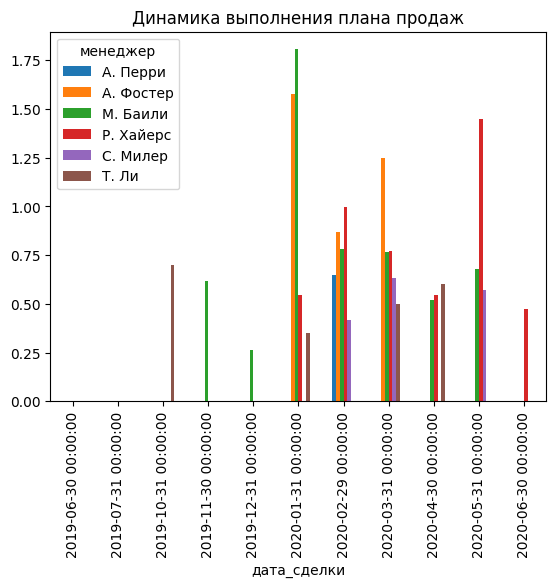

In [119]:
# Построение графика
plt.figure(figsize=(12, 8))
monthly_performance.unstack().plot(kind = 'bar')
plt.title('Динамика выполнения плана продаж')

In [120]:
# Расчет "сезонных просадок"
avg_monthly_performance = monthly_performance.groupby(level = 0).mean()
avg_total_performance = monthly_performance.mean()
print(f'Среднее выполнение плана по месяцам: {avg_monthly_performance}')
print('\n')
print(f'Среднее общее выполнение плана: {avg_total_performance}')

Среднее выполнение плана по месяцам: дата_сделки
2019-06-30    0.000000
2019-07-31    0.000000
2019-10-31    0.700000
2019-11-30    0.620000
2019-12-31    0.262857
2020-01-31    1.069107
2020-02-29    0.742838
2020-03-31    0.783985
2020-04-30    0.555000
2020-05-31    0.899167
2020-06-30    0.118438
dtype: float64


Среднее общее выполнение плана: 0.6320568712896298


In [121]:
# Оценка важности периодов
sales_by_period = data.groupby('дата_сделки')['продажи_факт,_тыс.руб'].sum()
total_sales = data['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по периодам: {sales_by_period / total_sales}')

Доля продаж по периодам: дата_сделки
2019-06-03    0.000000
2019-07-03    0.000000
2019-10-04    0.010415
2019-11-04    0.009225
2019-12-02    0.011605
                ...   
2020-06-17    0.043743
2020-06-18    0.043743
2020-06-19    0.025293
2020-06-20    0.000000
2020-06-27    0.000000
Name: продажи_факт,_тыс.руб, Length: 62, dtype: float64


In [122]:
# Расчёт продаж по сегментам
sales_by_segment = data.groupby('продуктовый_сегмент')['продажи_факт,_тыс.руб'].sum()
total_sales = data['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по сегментам: {sales_by_segment / total_sales}')

Доля продаж по сегментам: продуктовый_сегмент
Автозапчасти              0.010415
Бассейн                   0.022318
Другое                    0.107497
Игрушки                   0.003720
Косметика                 0.002976
Медецина                  0.005951
Оборудование              0.522221
Одежда                    0.069185
Охота и рыбалка           0.000000
Свет                      0.103406
Спорт товары              0.011159
Сувениры                  0.014432
Ткань и аксессуары        0.084986
Упаковка                  0.010043
Электронные устройства    0.031691
Name: продажи_факт,_тыс.руб, dtype: float64


In [123]:
# Популярные сегменты в прошлом
past_sales = data[data['дата_сделки'] < '2022-01-01']
sales_by_segment_past = past_sales.groupby('продуктовый_сегмент')['продажи_факт,_тыс.руб'].sum()
total_sales = past_sales['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по сегментам в прошлом: {sales_by_segment_past / total_sales}')

Доля продаж по сегментам в прошлом: продуктовый_сегмент
Автозапчасти              0.010415
Бассейн                   0.022318
Другое                    0.107497
Игрушки                   0.003720
Косметика                 0.002976
Медецина                  0.005951
Оборудование              0.522221
Одежда                    0.069185
Охота и рыбалка           0.000000
Свет                      0.103406
Спорт товары              0.011159
Сувениры                  0.014432
Ткань и аксессуары        0.084986
Упаковка                  0.010043
Электронные устройства    0.031691
Name: продажи_факт,_тыс.руб, dtype: float64


In [124]:
# География продаж
sales_by_region = data.groupby('город')['продажи_факт,_тыс.руб'].sum()
biggest_sales_by_region = sales_by_region.sort_values(ascending = False).head(5)
total_sales = data['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по регионам: {sales_by_region / total_sales}')
print('\n')
print(f'Самые доходные регионы: {biggest_sales_by_region / total_sales}')

Доля продаж по регионам: город
Волгоград          0.063234
Казань             0.119623
Кемерово           0.022318
Курск              0.010415
Липецк             0.000000
Магнитогорск       0.114267
Москва             0.055303
Нижний Новгород    0.024326
Новосибирск        0.085180
Омск               0.003720
Оренбург           0.040916
Пермь              0.011456
Самара             0.082933
Санкт-Петербург    0.020384
Саратов            0.006398
Севастополь        0.000000
Сочи               0.103406
Стоврополь         0.000000
Тула               0.027525
Улан-Удэ           0.014432
Уфа                0.064722
Челябинск          0.129443
Ярославль          0.000000
Name: продажи_факт,_тыс.руб, dtype: float64


Самые доходные регионы: город
Челябинск       0.129443
Казань          0.119623
Магнитогорск    0.114267
Сочи            0.103406
Новосибирск     0.085180
Name: продажи_факт,_тыс.руб, dtype: float64


In [125]:
# Влияние канала продаж
sales_by_channel = data.groupby('канал_продаж')['продажи_факт,_тыс.руб'].sum()
total_sales = data['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по каналам: {sales_by_channel / total_sales}')

Доля продаж по каналам: канал_продаж
Вебсайт                0.011903
Выставка               0.426180
Контекстная реклама    0.036452
Почта                  0.023062
Рекомендация           0.268334
Холодный звонок        0.234069
Name: продажи_факт,_тыс.руб, dtype: float64


In [126]:
# Анализ товарных категорий
sales_by_category = data.groupby('название_заказа')['продажи_факт,_тыс.руб'].sum()
total_sales = data['продажи_факт,_тыс.руб'].sum()
print(f'Доля продаж по категориям: {sales_by_category / total_sales}')

Доля продаж по категориям: название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       0.034221
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    0.025293
AO 9852 - 7 / A 7971 B -7                  0.014581
C 906 MX 67/AE 5350 67                     0.008109
C 909 HA / AE 1720                         0.014581
                                             ...   
Упаковка (Poland)                          0.002157
Упаковка mix                               0.006695
Швейная фурнитура                          0.009820
Экструзионный пластометр                   0.010415
Электронные устройства                     0.008927
Name: продажи_факт,_тыс.руб, Length: 92, dtype: float64


In [127]:
# Товарные категории по числу клиентов
categories_by_clients = data.groupby('название_заказа')['номер_заказа'].nunique()
total_clients = data['номер_заказа'].nunique()
print(f'Доля клиентов по категориям: {categories_by_clients / total_clients}')

Доля клиентов по категориям: название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       0.034483
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    0.017241
AO 9852 - 7 / A 7971 B -7                  0.008621
C 906 MX 67/AE 5350 67                     0.008621
C 909 HA / AE 1720                         0.008621
                                             ...   
Упаковка (Poland)                          0.008621
Упаковка mix                               0.008621
Швейная фурнитура                          0.017241
Экструзионный пластометр                   0.017241
Электронные устройства                     0.017241
Name: номер_заказа, Length: 92, dtype: float64


In [128]:
# Популярные товарные категории по продажам
popular_categories_by_sales= sales_by_category.nlargest(10)
print(f'Популярные товарные категории по продажам: {popular_categories_by_sales}')

Популярные товарные категории по продажам: название_заказа
Влагостойкая одежда                        3900
"NINGBO YOURLITE IMP AND EXP CO.,LTD       2300
К581НО-67 / АЕ6868-67                      2200
Kapego                                     2000
Гидромотор экскаватора  (KAWASAKI)         2000
M 766 OB / BT 6525                         1900
О230НО-750 / GZ1334K                       1760
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    1700
Гидробаня и 4 бассейна                     1500
LRA 18484                                  1450
Name: продажи_факт,_тыс.руб, dtype: int64


In [129]:
# Популярные товарные категории по клиентам
popular_categories_by_client = categories_by_clients.nlargest(10)
print(f'Популярные товарные категории по продажам: {popular_categories_by_client}')

Популярные товарные категории по продажам: название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       4
HAINING TIANYI TEXTILE CO.,LTD             4
Ткань 40HC Shanghai                        3
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    2
MATERIAL DISCOVERY CO.,LTD                 2
NAM SUNG                                   2
NINGBO FULEDСветING CO.,LIMITED            2
PUJIANG SALE CRAFT CO.,LTD                 2
SEITY Свет (ZHONGSHAN) CO., LTD.           2
USB                                        2
Name: номер_заказа, dtype: int64


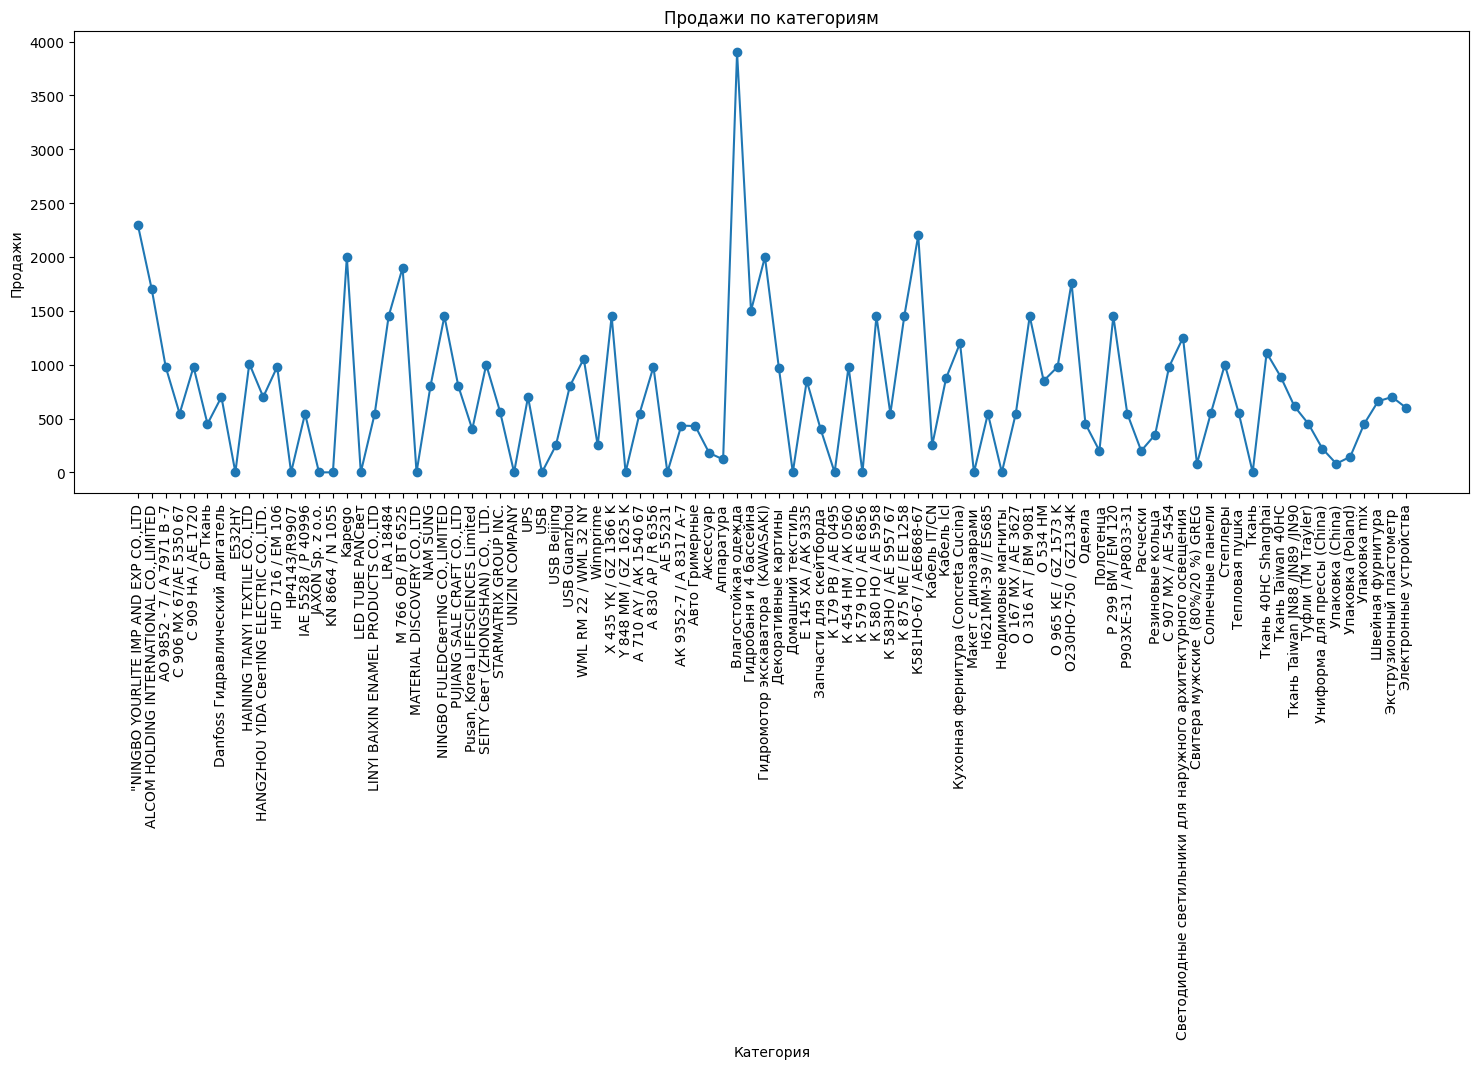

In [130]:
plt.figure(figsize=(18, 6))
plt.plot(sales_by_category.index, sales_by_category.values, marker='o')
plt.xlabel('Категория')
plt.ylabel('Продажи')
plt.title('Продажи по категориям')
plt.xticks(rotation=90)
plt.show()

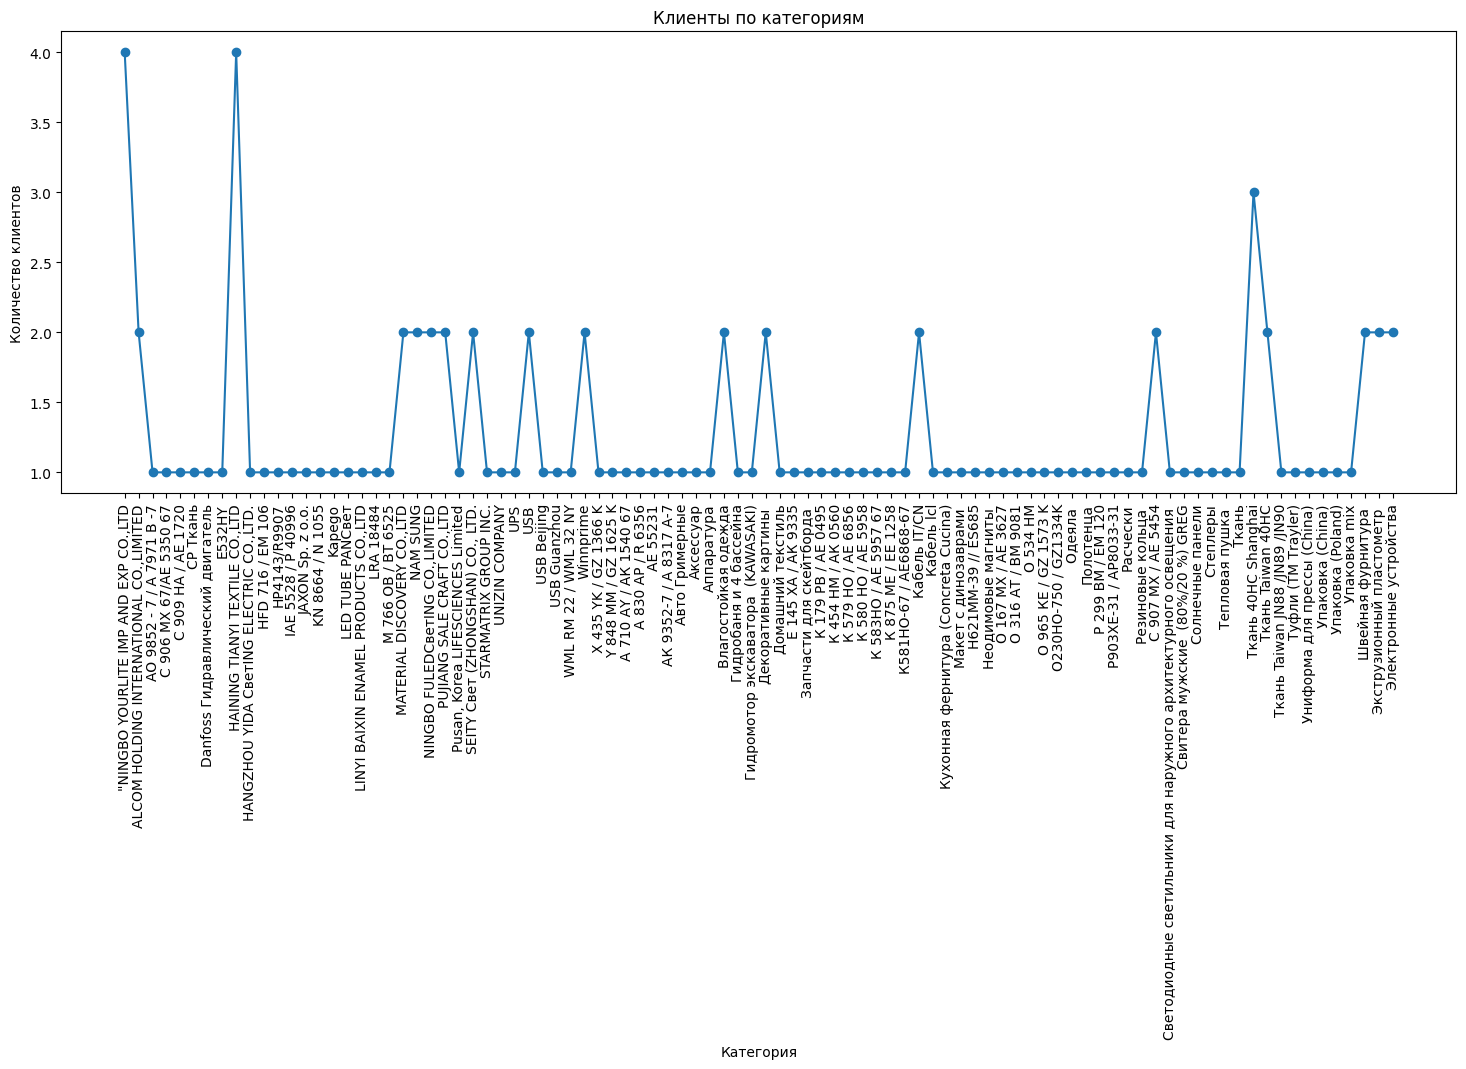

In [131]:
plt.figure(figsize=(18, 6))
plt.plot(categories_by_clients.index, categories_by_clients.values, marker='o')
plt.xlabel('Категория')
plt.ylabel('Количество клиентов')
plt.title('Клиенты по категориям')
plt.xticks(rotation=90)
plt.show()

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

На основании проведенного анализа можно сделать следующие выводы:

 - Профилирование менеджеров по товарным категориям:
Некоторые товарные категории повышают высокий спрос и вносят значительный вклад в доход компании. Профилирование менеджеров с учетом их компетенций и опыта в работе с разными категориями позволяет повысить их потенциал, что может привести к росту продаж и прибыли.

 - Профилирование менеджеров по каналам продаж:
Анализ выявил, что каналы продаж обеспечивают более высокий доход. Профилирование менеджеров в соответствии с их специализацией на канале поможет оптимизировать работу и повысить эффективность продаж.

 - Развитие ключевых компонентов продаж:
Наиболее доходные каналы продаж обладают потенциалом для дальнейшего роста. Их развитие может способствовать улучшению общей прибыли компании и изменению ситуации на рынке.

 - Расширение деятельности в перспективных регионах:
Регионы с высоким спросом на продукцию компании предоставляют значительные возможности для увеличения продаж. Присутствие в таких регионах может положительно сказаться на доходах и рыночном положении компании.

Рекомендации, сформулированные наа основе полученных выводов:

 - Организовать профилирование менеджеров по товарным категориям и каналам продаж для повышения эффективности их работы.
 - Сфокусироваться на развитии наиболее прибыльных направлений продаж и регионов с высоким спросом.
 - Постоянно анализируйте данные для выявления новых возможностей и рыночных тенденций.
 - Разработать стратегию увеличения продаж и доходов в перспективных направлениях.

План действий, построенный на основе рекомендаций:

 - В течение 3-х месяцев проводим профилирование менеджеров с учетом товарных категорий и категорий продаж.
 - Разработать и начать внедрять стратегии по развитию ключевых показателей продаж и регионов в течение следующих 6 месяцев.
 - Обеспечить непрерывный мониторинг данных и поиск новых рыночных возможностей.
 - Оценить результаты реализованных инициатив через 12 месяцев, с целью корректировки существующих стратегий.